# Load Data

In [1]:
train_csv_path = '../input/toy-dataset-for-regression-and-uq/Data1_Train.csv'
test_csv_path = '../input/toy-dataset-for-regression-and-uq/Data1_Test.csv'
val_csv_path = '../input/toy-dataset-for-regression-and-uq/Data1_Val.csv'


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
train_df = pd.read_csv(train_csv_path)
val_df = pd.read_csv(val_csv_path)
train_df.head()

,Input1,Output
0,0.000000,0.037112
1,0.001257,0.005684
2,0.002513,-0.017941
3,0.003770,0.020993
4,0.005027,-0.016084


In [2]:
import pickle as pkl

fileName =  '../input/a1-data-to-similar-events/Similarity'
fileObject2 = open(fileName, 'rb')
Imported_data = pkl.load(fileObject2)
fileObject2.close()

#print('Similarity Thresholds:',Imported_data[:,0])

#print('Most Similarity at:',Imported_data[:,1])

Similar_event_count = len(Imported_data[0,:])-1
print('Number of Similar Samples Considered', Similar_event_count)

Similarity_thresholds = Imported_data[:,0]

Sample_density = Similar_event_count/ Similarity_thresholds/100
#Sample_density = number of samples with less than 1% (of range) deviation

Similar_samples = Imported_data[:,1:Similar_event_count+1]

print('Target Shape', Sample_density.shape, 'Similar Samples Matrix Shape:', Similar_samples.shape)

Number of Similar Samples Considered 100
Target Shape (5000,) Similar Samples Matrix Shape: (5000, 100)


# Similar Indexes of a Sample

In [3]:
UB_point = 0.05 #ny value from 0 to 1

# UB_point (Uncertainty Bound) is the cumulative probability from the lower-end.

sample_no = 101 #The sample we are considering 


input_=[]
output_=[]
for row in train_df.iloc:
    input_.append((row[0:len(row)-1]).astype(float))
    output_.append(row[-1])

number_of_input = len(row)-1
Output_column_number = len(row)

print(number_of_input)

indexes=Similar_samples[sample_no,:]

print(indexes.shape)


1
(100,)


# Plotting

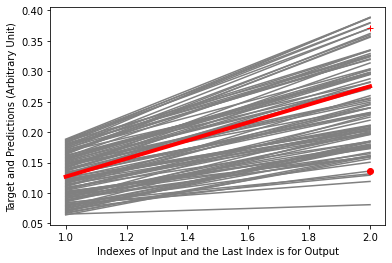

In [4]:
fig, (ax1) = plt.subplots(1, 1)

ax1.set(xlabel="Indexes of Input and the Last Index is for Output", ylabel="Target and Predictions (Arbitrary Unit)" )
plt.rcParams["figure.figsize"] = (5,8)


Probability_density = []
for iter1 in indexes[1:]:
    #Plotting example Inputs
    #print(iter1)
    ax1.plot(range(1,number_of_input+1),input_[iter1.astype(np.int64)].values, 'b')
    ax1.plot([number_of_input, number_of_input+1],[ input_[iter1.astype(np.int64)].values[-1], output_[iter1.astype(np.int64)]],'grey')
    Probability_density.append(output_[iter1.astype(np.int64)])

iter1 = indexes[0]
ax1.plot(range(1,number_of_input+1),input_[iter1.astype(np.int64)].values, 'r', linewidth=4)
ax1.plot([number_of_input, number_of_input+1],[ input_[iter1.astype(np.int64)].values[-1], output_[iter1.astype(np.int64)]],'r', linewidth=4)
Probability_density.append(output_[iter1.astype(np.int64)])

Probability_density = np.sort(Probability_density)

ax1.plot(number_of_input+1,Probability_density[np.round(Similar_event_count*UB_point).astype(np.int64)-1], 'ro', linewidth=14)

ax1.plot(number_of_input+1,Probability_density[np.round(Similar_event_count*(1-UB_point)).astype(np.int64)-1], 'r+', linewidth=14)
